In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
warnings.filterwarnings("ignore")

process data

In [2]:
df_train = pd.read_csv("train.csv") 
df_test = pd.read_csv("test.csv")

In [3]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

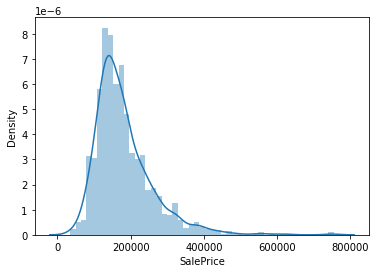

In [5]:
sns.distplot(df_train["SalePrice"])

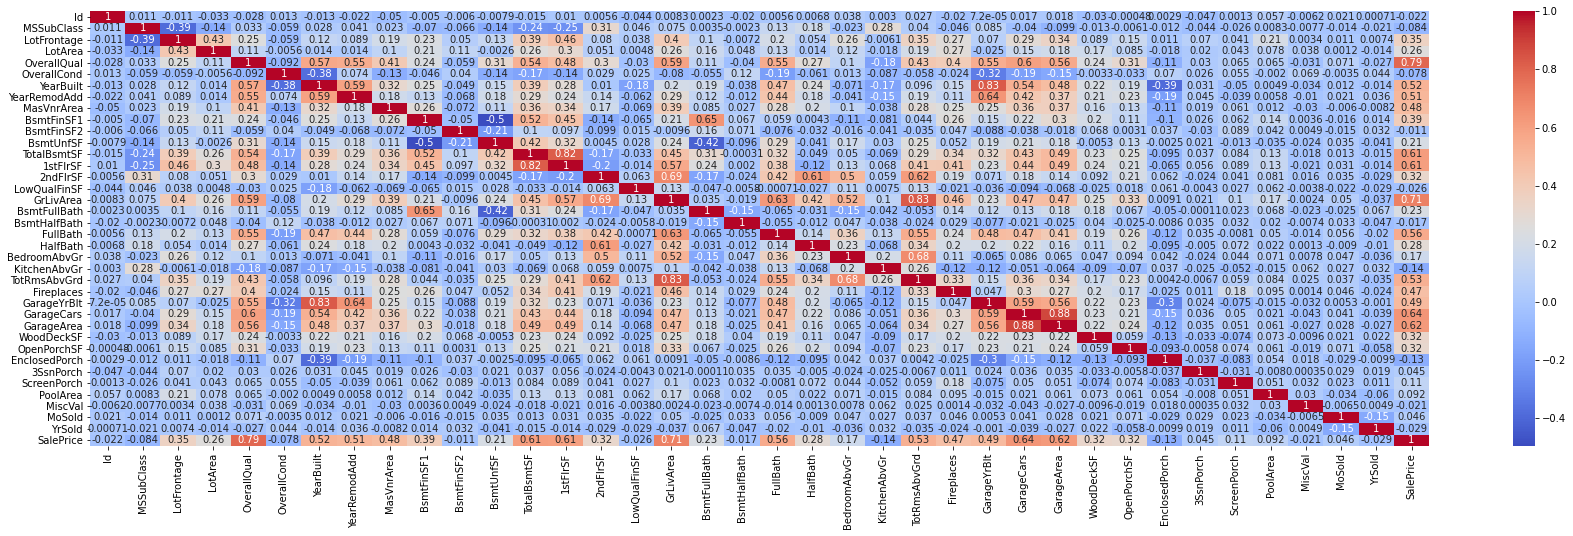

In [6]:
plt.figure(figsize=(30,8))
sns.heatmap(df_train.corr(),cmap='coolwarm',annot = True)
plt.show()

In [7]:
corr = df_train.corr()

In [8]:
corr[corr['SalePrice']>0.3].index

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [9]:
df_train = df_train[[ 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]
df_test = df_test[[ 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1460 non-null   int64  
 1   YearBuilt     1460 non-null   int64  
 2   YearRemodAdd  1460 non-null   int64  
 3   MasVnrArea    1452 non-null   float64
 4   BsmtFinSF1    1460 non-null   int64  
 5   TotalBsmtSF   1460 non-null   int64  
 6   1stFlrSF      1460 non-null   int64  
 7   2ndFlrSF      1460 non-null   int64  
 8   GrLivArea     1460 non-null   int64  
 9   FullBath      1460 non-null   int64  
 10  TotRmsAbvGrd  1460 non-null   int64  
 11  Fireplaces    1460 non-null   int64  
 12  GarageYrBlt   1379 non-null   float64
 13  GarageCars    1460 non-null   int64  
 14  GarageArea    1460 non-null   int64  
 15  WoodDeckSF    1460 non-null   int64  
 16  OpenPorchSF   1460 non-null   int64  
 17  SalePrice     1460 non-null   int64  
dtypes: float64(2), int64(16)
mem

In [11]:
df_train.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     81
MasVnrArea       8
OverallQual      0
TotRmsAbvGrd     0
OpenPorchSF      0
WoodDeckSF       0
GarageArea       0
GarageCars       0
Fireplaces       0
FullBath         0
YearBuilt        0
GrLivArea        0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtFinSF1       0
YearRemodAdd     0
SalePrice        0
dtype: int64

In [12]:
df_test.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     78
MasVnrArea      15
BsmtFinSF1       1
TotalBsmtSF      1
GarageArea       1
GarageCars       1
OverallQual      0
TotRmsAbvGrd     0
WoodDeckSF       0
Fireplaces       0
GrLivArea        0
FullBath         0
YearBuilt        0
2ndFlrSF         0
1stFlrSF         0
YearRemodAdd     0
OpenPorchSF      0
dtype: int64

In [13]:
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mean())
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mean())

In [14]:
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mean())
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean())
df_test['GarageCars'] = df_test['GarageCars'].fillna(df_test['GarageCars'].mean())
df_test['GarageArea'] = df_test['GarageArea'].fillna(df_test['GarageArea'].mean())
df_test['BsmtFinSF1'] = df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mean())
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mean())

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1460 non-null   int64  
 1   YearBuilt     1460 non-null   int64  
 2   YearRemodAdd  1460 non-null   int64  
 3   MasVnrArea    1460 non-null   float64
 4   BsmtFinSF1    1460 non-null   int64  
 5   TotalBsmtSF   1460 non-null   int64  
 6   1stFlrSF      1460 non-null   int64  
 7   2ndFlrSF      1460 non-null   int64  
 8   GrLivArea     1460 non-null   int64  
 9   FullBath      1460 non-null   int64  
 10  TotRmsAbvGrd  1460 non-null   int64  
 11  Fireplaces    1460 non-null   int64  
 12  GarageYrBlt   1460 non-null   float64
 13  GarageCars    1460 non-null   int64  
 14  GarageArea    1460 non-null   int64  
 15  WoodDeckSF    1460 non-null   int64  
 16  OpenPorchSF   1460 non-null   int64  
 17  SalePrice     1460 non-null   int64  
dtypes: float64(2), int64(16)
mem

In [16]:
X = df_train.drop("SalePrice", axis = 1)
y = df_train["SalePrice"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
y_train = y_train.reshape(y_train.shape[0], 1)

Linear Regression using Skearn

In [17]:
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred_test = lm.predict(X_test)

mean squared error and r2

In [18]:
metrics.mean_squared_error(y_test, y_pred_test)

1986957301.5797644

In [19]:
rfe = RFE(lm, n_features_to_select=6)             
rfe = rfe.fit(X_train, y_train)
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)


0.6993300026481384


Linear Regression

In [20]:
one = np.ones((X_train.shape[0],1))
X_train = np.concatenate((one, X_train), axis = 1)
one = np.ones((X_test.shape[0],1))
X_test = np.concatenate((one, X_test), axis = 1)

In [21]:
def grad(w):
    return 1/X_train.shape[0] * X_train.T.dot(X_train.dot(w) - y_train)

In [22]:
def SGD(w_init, grad, eta):
    w = [w_init]
    N = X_train.shape[0]
    count = 0
    for it in range(10):
            w_new = w[-1] - eta*grad(w[-1])
               
            if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:                                    
                    break
            w.append(w_new)  
    return w[-1]
        

In [23]:
y_test = np.asarray(y_test)
y_train = np.asarray(y_train)
w_initt = np.random.rand(18, 1)

In [24]:
W = SGD(w_initt, grad, 1e-100)

In [25]:
y_pred_test = X_test.dot(W)

In [26]:
y_pred_test[0]

array([8196.68636309])

In [28]:
metrics.mean_squared_error(y_test, y_pred_test) - 1986957301.5797644

33838585712.95404